# Лекция 2. python-docx, docxtpl, xlsxwriter, python-pptx

## python-docx

python-docx — это библиотека Python для создания и обновления файлов Microsoft Word (.docx).

установка - pip install python-docx

<a href="https://python-docx.readthedocs.io/en/latest/index.html">https://python-docx.readthedocs.io/en/latest/index.html</a>

In [ ]:
# Создание документа
from docx import Document
from docx.shared import Inches

# Document(docx: str | IO[bytes] | None = None)
document = Document() 

# add_heading(text: str = '', level: int = 1)
document.add_heading('Заголовок документа', 0)

# add_paragraph(text: str = '', style: str | ParagraphStyle | None = None) → Paragraph
document.add_paragraph('Абзац без форматирования')

# add_run(text: str | None = None, style: str | CharacterStyle | None = None) → Run
p = document.add_paragraph('Часть абзаца обычным текстом, ')
p.add_run('часть жирным шрифтом, ').bold = True
p.add_run(' а часть ')
p.add_run('курсивом.').italic = True

document.add_heading('Заголовок первого уровня', level=1)

document.add_paragraph('Некоторая цитата', style='Intense Quote')

document.add_paragraph('Элемент ненумерованного списка', 
                       style='List Bullet')
document.add_paragraph('Элемент нумерованного списка', 
                       style='List Number')

# add_table(rows, cols)
table = document.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Номер'
hdr_cells[1].text = 'Название'
hdr_cells[2].text = 'Количество'

document.save('test.docx')

In [ ]:
# Изменение существующего документа
from docx import Document

document = Document('test.docx')
for par in document.paragraphs:
    print(par.text)

for table in document.tables:
    print(table.rows[0].cells[0].text)

## docxtpl

docxtpl - библиотека для работы с word документами в формате шаблонов

pip install docxtpl

<a href ="https://docxtpl.readthedocs.io/en/latest/">https://docxtpl.readthedocs.io/en/latest/</a>

### Возможности Jinja2

In [ ]:
#### Выражения

{{ var_name }} # - подставит значение в документ из ключа var_name

In [ ]:
##### Условия

{% if number % 2 == 0 %}
    <div>{{ number }} - чётное</div>
{% else %}
    <div>{{ number }} - нечётное</div>
{% endif %}

In [ ]:
##### Циклы

{% for item in news %}
        <h2>{{item["title"]}}</h2>
        <div>{{item["content"]}}</div>
{% endfor %}
 
 
# Внутри цикла доступна переменная loop с рядом полезных атрибутов, например:
# index — индекс итерации с 1
# index0 — индекс итерации с нуля
# first — True, если первая итерация, иначе False
# last — True, если последняя итерация, иначе False

In [ ]:
##### Создание переменных
 
{% set a = 10 %}

In [ ]:
#### Расширение для docxtpl

{%p jinja2_tag %} # для параграфов
{%tr jinja2_tag %} # для строк таблицы
{%tc jinja2_tag %} # столбцы таблицы
{%r jinja2_tag %} # для run объектов

In [ ]:
from docxtpl import DocxTemplate
import datetime as dt

doc = DocxTemplate("tpl.docx")
context = {
    'name': 'Иван',
    'event_name': "Рыбалка",
    'place': "Владивосток",
    'date': dt.date.today(),
    'time': dt.datetime.now().strftime("%H:%M"),
    'items': ["Удочку",
              'Ведро',
              "Бур"]
}
doc.render(context)
doc.save("res.docx")

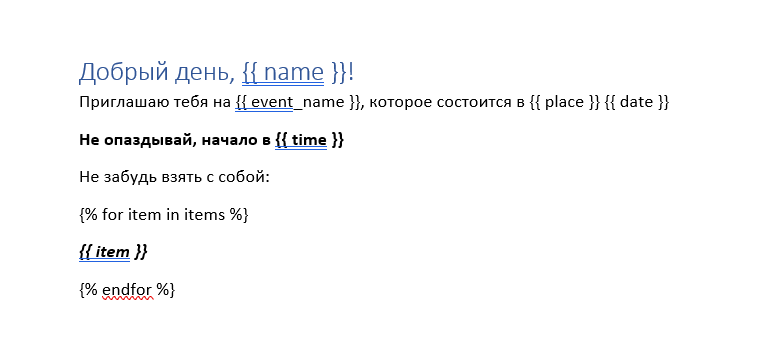

## xlsxwriter

Для работы с файлами формата .xlsx есть несколько библиотек, одна из них — xlsxwriter, предназначенная только для создания xlsx-файлов.

pip install xlsxwriter

<a href="https://xlsxwriter.readthedocs.io/">https://xlsxwriter.readthedocs.io/</a>

In [ ]:
import xlsxwriter
  
workbook = xlsxwriter.Workbook('Суммы.xlsx')
worksheet = workbook.add_worksheet()
 
data = [('Развлечения', 6800), ('Продукты', 25670), ('Транспорт', 3450),]
  
for row, (item, price) in enumerate(data):
    worksheet.write(row, 0, item)
    worksheet.write(row, 1, price)
 
row += 1
worksheet.write(row, 0, 'Всего')
worksheet.write(row, 1, '=SUM(B1:B3)')
 
workbook.close()

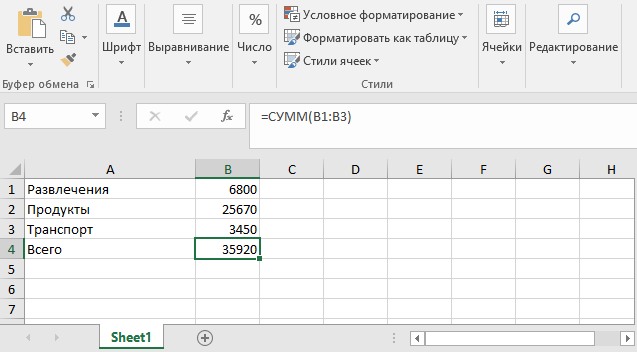

In [ ]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('диаграммы.xlsx')
worksheet = workbook.add_worksheet()
 
# Данные
data = [10, 40, 50, 20, 10, 50, 20]
worksheet.write_column('A1', data)
 
# Тип диаграммы
chart = workbook.add_chart({'type': 'line'})
 
# Строим по нашим данным
chart.add_series({'values': '=Sheet1!A1:A7'})
 
worksheet.insert_chart('C1', chart)
workbook.close()

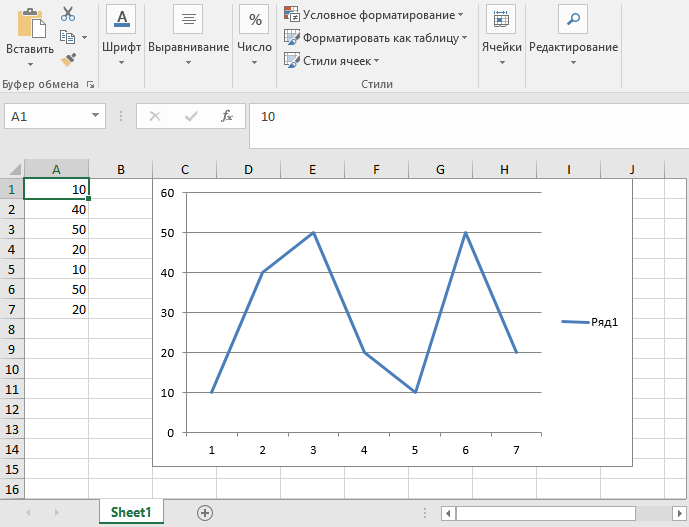

## Работа с CSV

Имя: строка (50)
Фамилия: строка (50)
Пол: число (1)
Дата рождения: число (2)
Группа: строка (20)

<table>
    <tr>
        <th>Имя</th>
        <th>Фамилия</th>
        <th>Пол</th>
        <th>Возраст</th>
        <th>Группа</th>
    </tr>
    <tr>
        <td>Ганеев</td>
        <td>Рашид</td>
        <td>1</td>
        <td>18</td>
        <td>Б8119-01.03.02миопд</td>
    </tr>
    <tr>
        <td>Одновил</td>
        <td>Евгений</td>
        <td>1</td>
        <td>19</td>
        <td>Б8119-01.03.02миопд</td>
    </tr>
    <tr>
        <td>Маингарт</td>
        <td>Влад</td>
        <td>1</td>
        <td>20</td>
        <td>Б8119-01.03.02миопд</td>
    </tr>
    <tr>
        <td>Клюканова</td>
        <td>Диана</td>
        <td>0</td>
        <td>21</td>
        <td>Б8119-01.03.02систпро</td>
    </tr>
    <tr>
        <td>Никита</td>
        <td>Басов</td>
        <td>1</td>
        <td>22</td>
        <td>Б8119-01.03.02систпро</td>
    </tr>
    <tr>
        <td>Луков</td>
        <td>Виталий</td>
        <td>1</td>
        <td>23</td>
        <td>Б8119-01.03.02систпро</td>
    </tr>
    <tr>
        <td>Идрисов</td>
        <td>Карим</td>
        <td>1</td>
        <td>55</td>
        <td>Б8119-01.03.02систпро</td>
    </tr>
</table>

* Форматы с фиксированной длиной записи
* Форматы с произвольной длиной записи


CSV (от англ. Comma-Separated Values — значения, разделённые запятыми) — текстовый формат, предназначенный для представления табличных данных. Строка таблицы соответствует строке текста, которая содержит одно или несколько полей, разделенных запятыми.

#### Пример файла:

Рашид,Ганеев,18,Б8119-01.03.02миопд

Евгений,Одновил,19,Б8119-01.03.02миопд

Влад,Маингарт,19,Б8119-01.03.02систпро

Клюканова,Диана,18,Б8119-01.03.02миопд

Никита,Басов,18,Б8119-01.03.02миопд

In [ ]:
# для работы с такими файлами в python есть встроенная библиотека csv
# В модуле есть два основных объекта: reader и writer, созданные, чтобы читать и создавать csv-файлы соответственно.
import csv
# csvfile = open('students.csv', encoding="utf8")
with open('students.csv', encoding="utf8") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for index, row in enumerate(reader):
        if index > 10:
            break
        print(row[0])
        

# reader является итератором, поэтому по нему можно пробежаться как по обычному списку

In [ ]:
with open('students.csv', encoding="utf8") as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    olds = sorted(reader, key=lambda x: int(x['age']) > 18, reverse=True)

for record in olds[:10]:
    print(record['name'])

In [ ]:
# использование объекта для записи (writer) аналогично «читателю» (reader)
with open('students2.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for stud in olds[:10]:
        writer.writerow(stud.values())

## Библиотека argparse

<a href="https://docs.python.org/3/library/argparse.html">https://docs.python.org/3/library/argparse.html</a>

In [ ]:
python3 files/ex1.py 110 1 1010 --base 3 --log files/work.log

In [3]:
import sys
print(sys.argv)

['/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py', '-f', '/Users/evgenij/Library/Jupyter/runtime/kernel-7baa7822-5434-4dd5-bd40-1880e1ac474b.json']


In [ ]:
import sys


def print_help(msg=""):
    print(f"Usage: {sys.argv[0]} [-h] [--log LOG] [--base BASE] int [int ...]\n{msg}")


def main(args):
    integers = []
    log_file = ''
    base = 2

    while (args):
        arg = args.pop(0)
        if arg == '-h':
            print_help()
            return None, None
        elif arg == '--base':
            try:
                base = int(args.pop(0))
            except ValueError:
                print_help(f"invalid base value: {arg}")
                return None, None
        elif arg == '--log':
            log_file = args.pop(0)
        else:
            integers.append(arg)

    if not integers:
        print_help('No int args')
        return None, None

    try:
        return list(map(lambda x: int(x, base), integers)), log_file
    except ValueError as e:
        print_help(f"invalid value: {e}")
        return None, None


numbers, log_file = main(sys.argv[1:])

if log_file is None:
    pass
elif log_file == "":
    print(*numbers)
else:
    with open(log_file, "wt") as output:
        print(*numbers, file=output)

In [ ]:
import argparse
import sys

parser = argparse.ArgumentParser(
    description="convert integers to decimal system")
parser.add_argument('integers', metavar='integers', nargs='+',
                    type=str, help='integers to be converted')
parser.add_argument('--base', default=2, type=int,
                    help='default numeric system')
parser.add_argument('--log', default=sys.stdout, type=argparse.FileType('w'),
                    help='the file where converted data should be written')

args = parser.parse_args()
s = " ".join(map(lambda x: str(int(x, args.base)), args.integers))
args.log.write(s + '\n')
args.log.close()

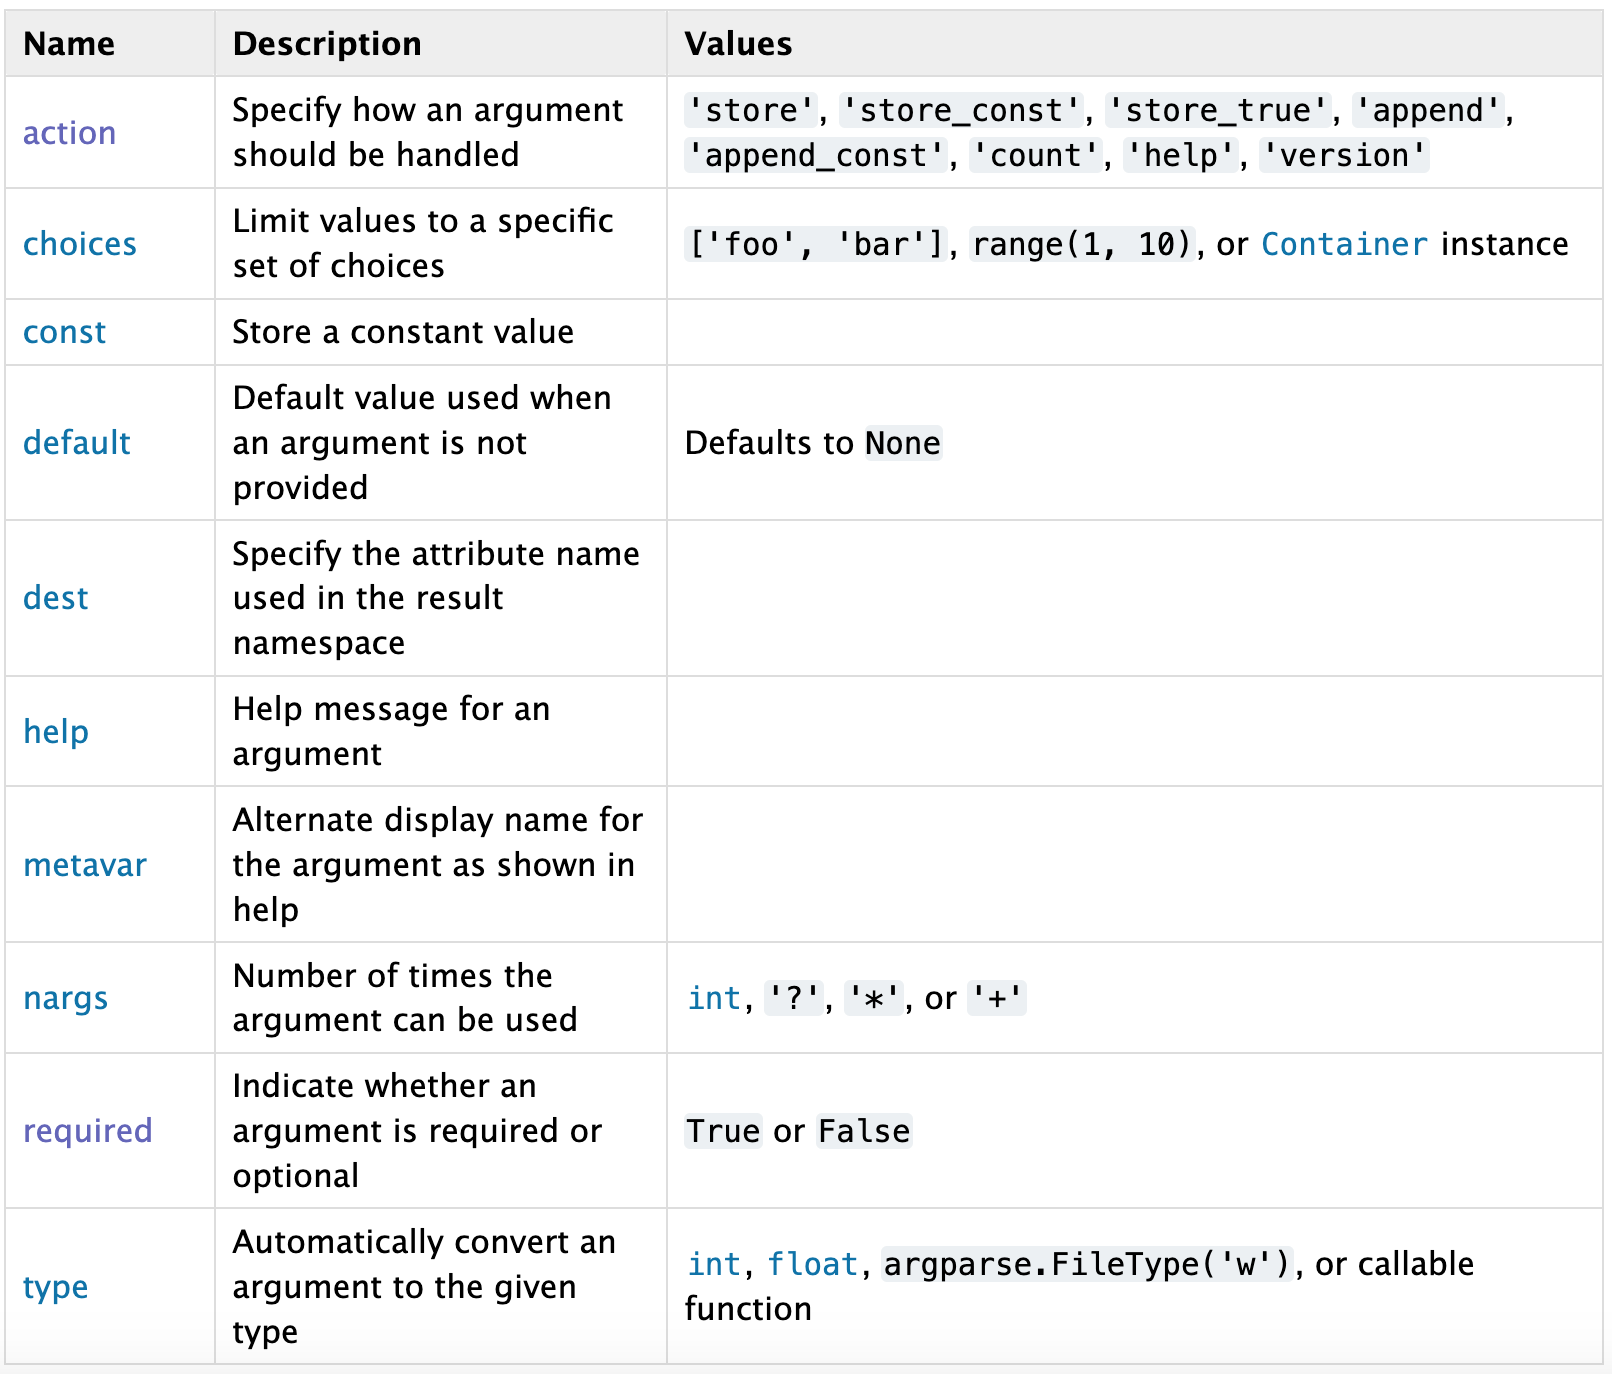